In [1]:
import numpy as np
import pandas as pd
from sklearn import *
import matplotlib.pyplot as plt
import random
from sklearn.datasets.samples_generator import make_blobs

In [2]:
#Générez des blobs gaussiens isotropes pour le clustering.
data0, target0 = make_blobs(n_samples = 50, n_features = 2, center_box = (-13, 13), random_state=1, centers = 1)

data1, target1 = make_blobs(n_samples = 50, n_features = 2, center_box = (-13, 13), random_state = 100, centers = 1)

#Y_labels = np.where(Y_labels==0, -1, 1) #labels
#affiche
print("Le nombre totales des données générer est:", data0.shape)
print("Nombre de classe est :", target1.shape)

Le nombre totales des données générer est: (50, 2)
Nombre de classe est : (50,)


In [ ]:
for i in range(len(target0)) :
    target0[i] = 1
    target1[i] = -1
data, target = np.vstack((data0, data1)), np.hstack((target0, target1))
w = np.array([0.3, 0.8, 0.4])
data = [ np.concatenate(([1], [i for i in da])) for da in data]

In [4]:
# Affichage de 5 premier donnée associée à leur classes
for i in range(6):
    print("La donnée x" + str(i) ,":", data[i], "associée à la classe :", target[i])

La donnée x0 : [-1.15770218  4.01020031] associée à la classe : 1
La donnée x1 : [-1.50018927  3.19223913] associée à la classe : 1
La donnée x2 : [-1.15603986  4.52248111] associée à la classe : 1
La donnée x3 : [-1.65314608  2.75426679] associée à la classe : 1
La donnée x4 : [-0.85436677  3.47033727] associée à la classe : 1
La donnée x5 : [-0.4124535  1.0914585] associée à la classe : 1


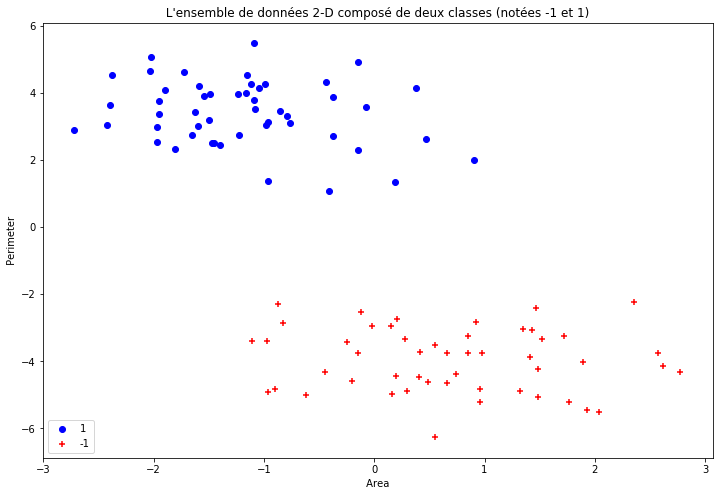

In [5]:
# Visualisation des données
fig, axes = plt.subplots(1, 1, figsize=(12, 8))
plt.scatter(data0[: , 0], data0[: , 1], c = 'b', marker = 'o', label = 1 )
plt.scatter(data1[: , 0], data1[: , 1], c = 'r', marker = '+', label = -1 )
axes.set_title(" L'ensemble de données 2-D composé de deux classes (notées -1 et 1) ")
axes.set_xlabel(" Area ")
axes.set_ylabel(" Perimeter ")
axes.legend(loc = 3)
plt.show()

<img src="Algorithme Adaline.PNG" style="width:680px;height:580px;">

In [10]:
def err_adal(x, w, y):
    """
    calculer l’écart entre la sortie désirée et la sortie calculée
    
    Argument :
    x : les données d'entrées
    y : sortie désirée
    w : les poids de réseaux
    
    Return : 
    l'erreur 
    """
    
    return y - np.dot(x.T, w)

In [7]:
def grad_adal(x, ek):
    """
    calculer l'approximation de gradient
    
    Argument :
    ek : l'écart
    X : les données
    
    Return :
    l'approximation du gradient
    """ 
    return -2 * np.dot(x.T, ek)

In [8]:
def adapt_adal(w, learning_rate, grads):
    """
    fait la mise à jour des poids
    
    Argument :
    W : les poids de réseaux
    learning_rate : le pas d'apprentissage
    gradient : l'approximation du gradient
    
    Return :
    la mise à jour de W
    """
    return w - learning_rate * grads

In [16]:
# Test de ces fonctions

a = err_adal(data[1], w, target[1])
b = grad_adal(data[1], a)
c = adapt_adal(w, 0.1, b)
print("\n Erreur adaline :", a, "\n Gradient adaline :", b, "\n New poids :", c)


 Erreur adaline : 0.6232557641208805 
 Gradient adaline : [-1.24651153  1.87000322 -3.97916288] 
 New poids : [0.42465115 0.61299968 0.79791629]


<img src="Example.PNG" style="width:650px;height:400px;">

In [17]:
def activation(x):
    """
    Fonction de seuillage 
    
    Arguments :
    x : la sortie de l'activation lineaire
    
    Return : 
    1 si x positive
    -1 sinon
    """
    if (x > 0.0) :
        return 1
    else :
        return -1

In [18]:
def adaline(x, y, w, learning_rate, iteration):
    """
    
    Algorithme d'un reseaux de neurone de type ADALINE : Adaptive Linear Element
    
    Arguments :
    X_data : les données d'entrée
    Y : les étiqueté désirée
    learning_rate : le pas d'apprentissage de gradient descend
    itération : le nombre d'itération pour faire l'apprentissage
    
    Return :
    poids, linear_activation, l'écart, nombre d'itéation, gradient_approximation
    
    """
    i = 0
    poids = []
    for itr in range(iteration):
        
        poids.append(w)
        
        for x, y in zip(data, target) :
            ek = err_adal(x, w, y)
            
            if(abs(ek) > 0.001) :
                dw = grad_adal(x, ek)
                w = adapt_adal(w, learning_rate, dw)
            i+=1       
    weight = {"w" : w}
        
    
    return weight, poids, i

In [19]:
weight, poids, i = adaline(data, target, w, 0.001, 51)

In [24]:
for i in [0, 5, 10, 15, 20, 25, 30, 40, 50]:
    print("Le poid à l'itération "+ str(i), ':', poids[i] )

Le poid à l'itération 0 : [0.3 0.8 0.4]
Le poid à l'itération 5 : [0.24597319 0.36350484 0.36028984]
Le poid à l'itération 10 : [0.17715276 0.17079516 0.30702054]
Le poid à l'itération 15 : [0.12809877 0.07679869 0.27840611]
Le poid à l'itération 20 : [0.09734679 0.02899322 0.26286693]
Le poid à l'itération 25 : [0.07915034 0.00394497 0.25437564]
Le poid à l'itération 30 : [ 0.06869661 -0.00944008  0.2497067 ]
Le poid à l'itération 40 : [ 0.05948052 -0.02064278  0.24572372]
Le poid à l'itération 50 : [ 0.05661602 -0.02400345  0.24451192]


In [21]:
def g(x, w):
    """
    l'equation de séparateur
    
    """
    return -(w[0]/w[2]+(w[1]/w[2])*x)

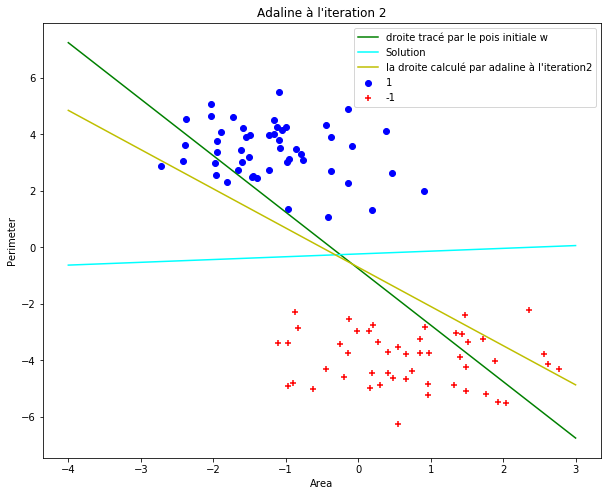

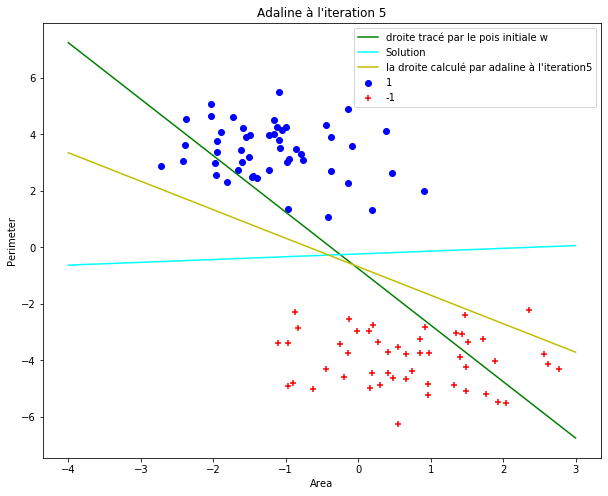

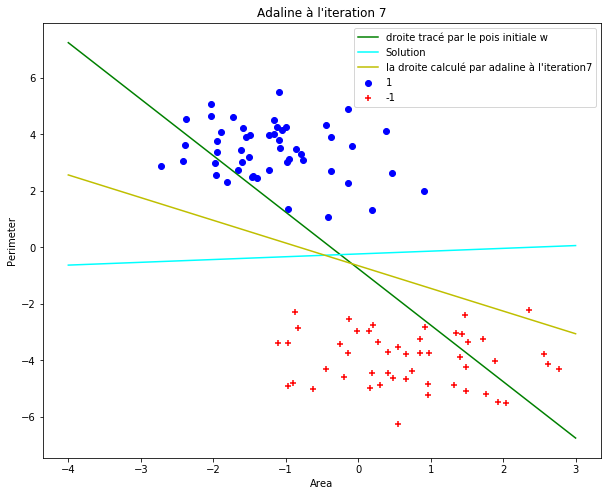

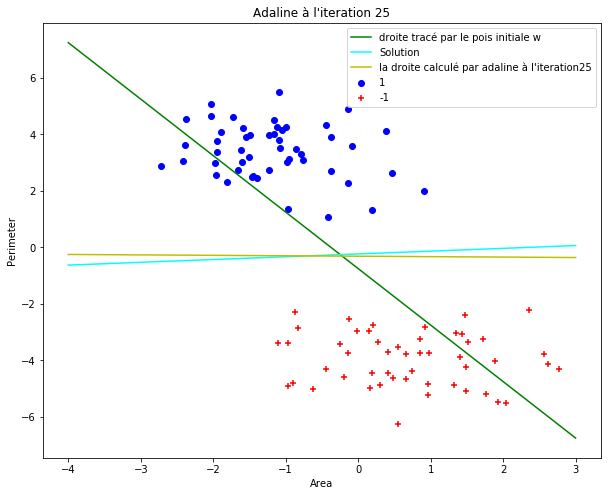

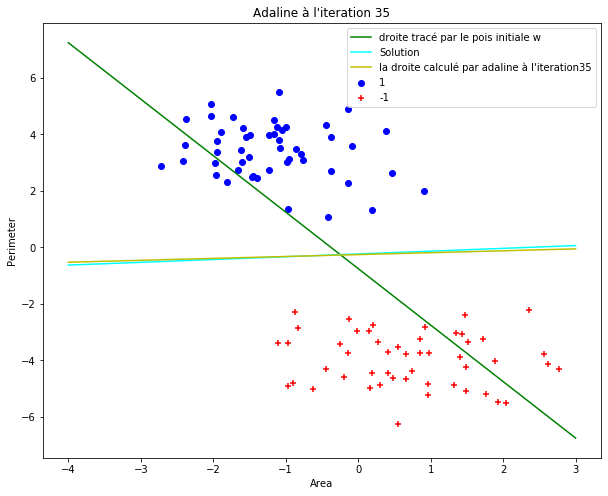

In [23]:
for i in [2, 5, 7, 25, 35]:
    fig, axes = plt.subplots(1, 1, figsize=(10, 8))
    plt.scatter(data0[: , 0], data0[: , 1], c = 'b', marker = 'o', label = 1 )
    plt.scatter(data1[: , 0], data1[: , 1], c = 'r', marker = '+', label = -1 )
    plt.plot(range(-4,4), [g(x, w) for x in range(-4, 4)], 'green', label = 'droite tracé par le pois initiale w')
    plt.plot(range(-4,4), [g(x, weight["w"]) for x in range(-4, 4)], 'cyan', label = 'Solution')
    plt.plot(range(-4,4), [g(x, poids[i]) for x in range(-4,4)], 'y' , label = "la droite calculé par adaline à l'iteration"+ str(i))
    plt.title("Adaline à l'iteration "+str(i))
    plt.xlabel("Area")
    plt.ylabel("Perimeter")
    plt.legend()
    plt.show()

<img src="Algorithme Perceptron.PNG" style="width:680px;height:580px;">

In [31]:
def f(z) :
    """
    fonction d'activation ---- seuillage
    
    Arguments:
    z : lineair activation
    
    Return :
    1 ou -1
    """
    
    if(z > 0) :
        return 1
    else :
        return -1

In [25]:
def sortie_perc(x,w):
    """
    La sortie calculer par le perceptron
    
    Arguments :
    x : les données d'entrer
    w : les poids de réseaux
    
    Return : 
    la classe désirée    
    """
    
    return f(np.dot(x.T, w))

In [28]:
def grad_perc(x, w, d):
    """
    L'approximation de gradient 
    
    Arguments :
    x : les données d'entrer
    w : le poid
    d : sortie désirée
    
    Return :
    gradient de l'erreur
    """
    
    return - np.dot(w, np.dot(x, d))

In [27]:
def adapt_perc(w,grad,eps):
    """
    Adaptation des poids
    
    Arguments :
    w : le poid précedent
    grad : le gradient de l'erreur
    eps : le pas d'apprentissage
    
    Return :
    new poids
    """
    
    return w - eps * grad

In [55]:
def perceptron(X, w, y, learning_rate, iteration):
    
    """
    Algorithme d'un reseaux de neurone de type PERCEPTRON
    
    Arguments :
    x : les données d'entrée
    y : les étiqueté désirée
    learning_rate : le pas d'apprentissage de gradient descend
    itération : le nombre d'itération pour faire l'apprentissage
    
    Return :
    poids, nombre d'itéation, gradient_approximation
    
    """
    
    i = 0
    poids = []
    
    for itr in range(iteration) :
        
        poids.append(w)
        for x, d in zip(X, y) :
            
            res = sortie_perc(x, w)
            if (res != d) :
                dw = grad_perc(x, w, d)
                w = adapt_perc(w, dw, learning_rate)
                
            poids.append(w)
            i+=1
        weight = {"w" : w}
    
    return weight, i, poids

In [57]:
perceptron(data, w, target, 0.1, 10)

({'w': array([-1.65540323e+99, -1.65540323e+99, -1.65540323e+99])},
 1000,
 [array([0.3, 0.8, 0.4]),
  array([0.3, 0.8, 0.4]),
  array([0.3, 0.8, 0.4]),
  array([0.3, 0.8, 0.4]),
  array([0.3, 0.8, 0.4]),
  array([0.3, 0.8, 0.4]),
  array([0.3, 0.8, 0.4]),
  array([0.3, 0.8, 0.4]),
  array([0.3, 0.8, 0.4]),
  array([0.3, 0.8, 0.4]),
  array([0.3, 0.8, 0.4]),
  array([0.3, 0.8, 0.4]),
  array([0.3, 0.8, 0.4]),
  array([0.3, 0.8, 0.4]),
  array([0.3, 0.8, 0.4]),
  array([0.22778326, 0.72778326, 0.32778326]),
  array([0.21951047, 0.71951047, 0.31951047]),
  array([0.21951047, 0.71951047, 0.31951047]),
  array([0.21951047, 0.71951047, 0.31951047]),
  array([0.21951047, 0.71951047, 0.31951047]),
  array([0.21951047, 0.71951047, 0.31951047]),
  array([0.21951047, 0.71951047, 0.31951047]),
  array([0.21747299, 0.71747299, 0.31747299]),
  array([0.21747299, 0.71747299, 0.31747299]),
  array([0.21747299, 0.71747299, 0.31747299]),
  array([0.16219242, 0.66219242, 0.26219242]),
  array([0.1621924

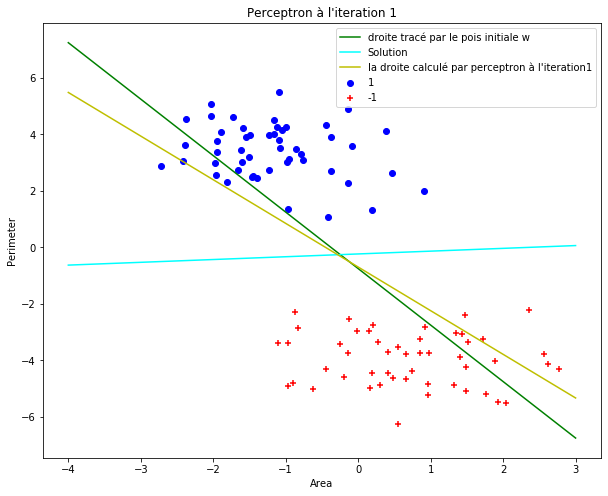

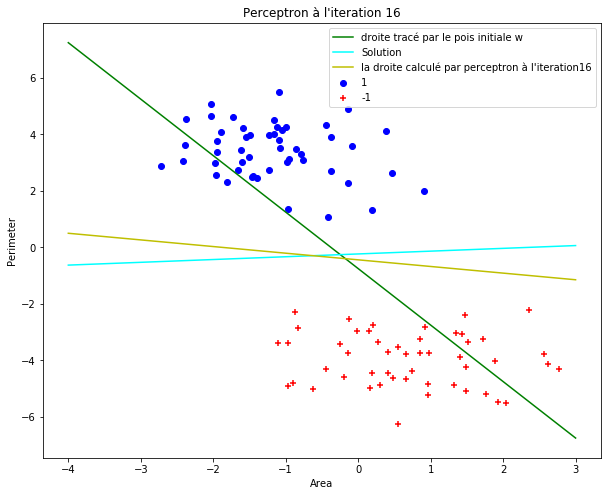

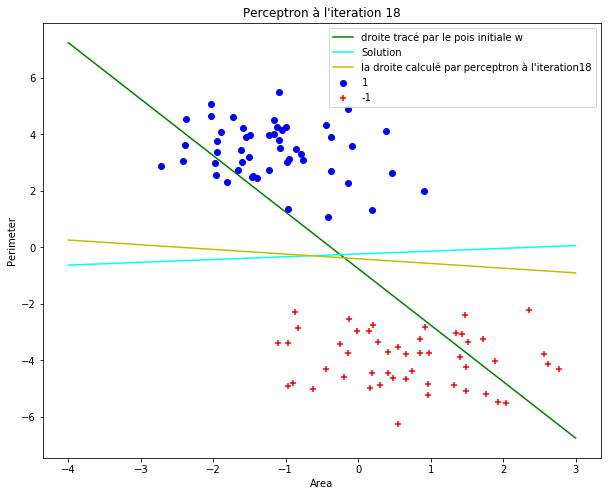

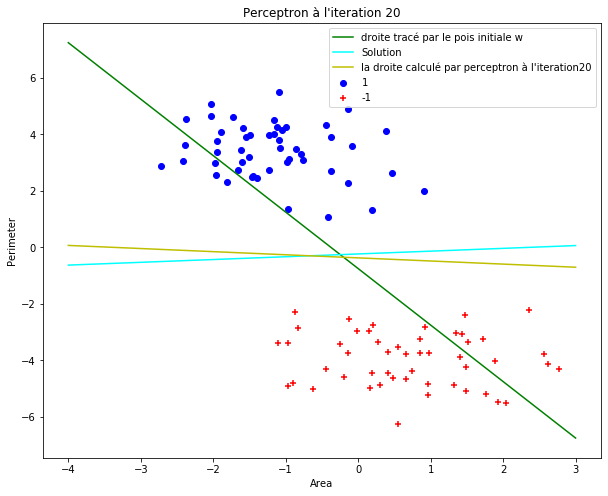

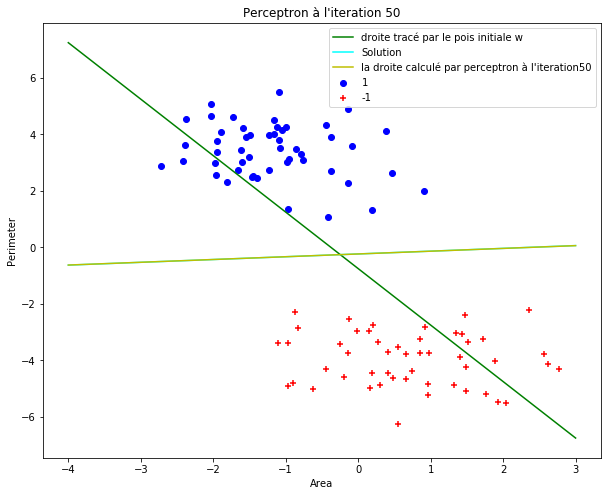

In [58]:
for i in [1, 16, 18, 20, 50]:
    fig, axes = plt.subplots(1, 1, figsize=(10, 8))
    plt.scatter(data0[: , 0], data0[: , 1], c = 'b', marker = 'o', label = 1 )
    plt.scatter(data1[: , 0], data1[: , 1], c = 'r', marker = '+', label = -1 )
    plt.plot(range(-4,4), [g(x, w) for x in range(-4, 4)], 'green', label = 'droite tracé par le pois initiale w')
    plt.plot(range(-4,4), [g(x, weight["w"]) for x in range(-4, 4)], 'cyan', label = 'Solution')
    plt.plot(range(-4,4), [g(x, poids[i]) for x in range(-4,4)], 'y' , label = "la droite calculé par perceptron à l'iteration"+ str(i))
    plt.title("Perceptron à l'iteration "+str(i))
    plt.xlabel("Area")
    plt.ylabel("Perimeter")
    plt.legend()
    plt.show()

# Artificial Neural Networks : From Perceptron to Deep Learning

      Master Statistics and Data Science
      Pr.Younès BENNANI